In [16]:
# !pip install awswrangler
# !pip install holidays
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

# import matplotlib.pyplot as plt
# import matplotlib as mpl
# %matplotlib inline
# plt.rcParams['axes.unicode_minus'] = False
# path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# font_name = mpl.font_manager.FontProperties(fname=path).get_name()
# mpl.rc('font', family=font_name)
# mpl.font_manager._rebuild()

## Data Load

In [17]:
import awswrangler as wr
import pandas as pd
import holidays

## 2016 ~ 2022 7년간 데이터
df = wr.s3.read_csv('s3://poc-2208-8meals/data/pigprice(2016-2022)_20230201.csv')

## EDA

In [13]:
for grade in df['등급'].unique():
    print(f"NaN values in {grade} : {df[df['등급'] == grade].isna().sum().sum()}")

NaN values in 1+ : 35196
NaN values in 1 : 34966
NaN values in 2 : 34840
NaN values in 등외 : 41430
NaN values in 등외제외 : 34812
NaN values in 모돈 : 78967


In [93]:
# for i in [df['등급'].unique()]:  
#     print(i)
#     df[(df['등급'] == i)]

In [100]:
df['year']

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
15223    2022
15224    2022
15225    2022
15226    2022
15227    2022
Name: year, Length: 15228, dtype: int64

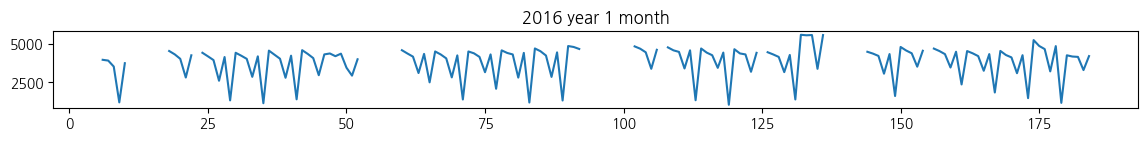

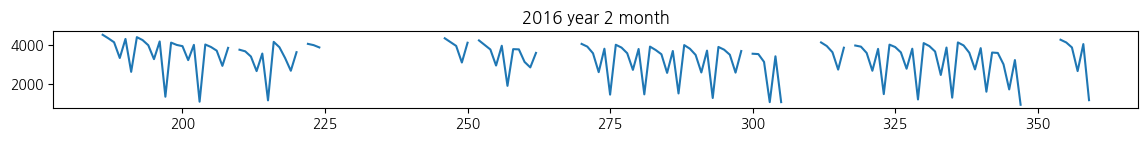

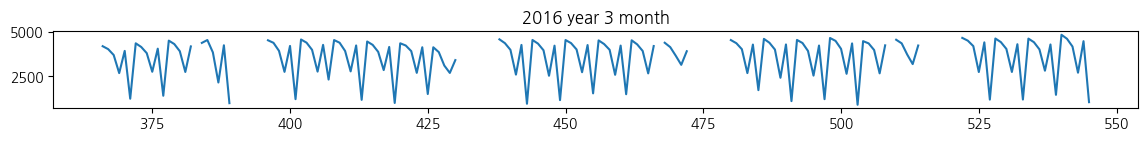

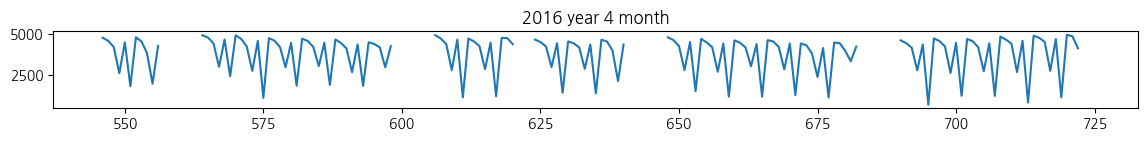

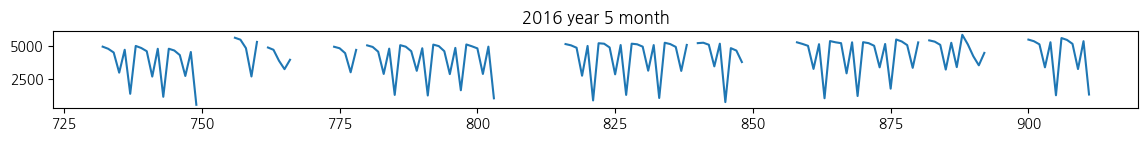

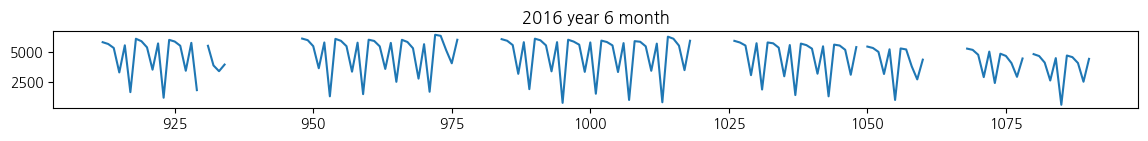

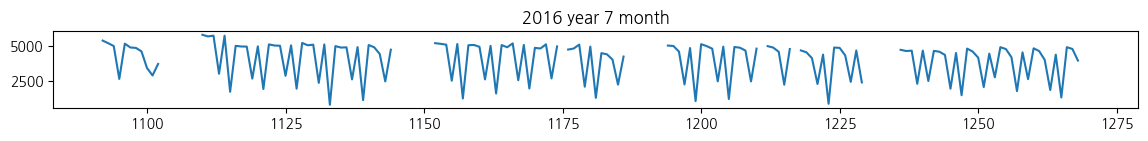

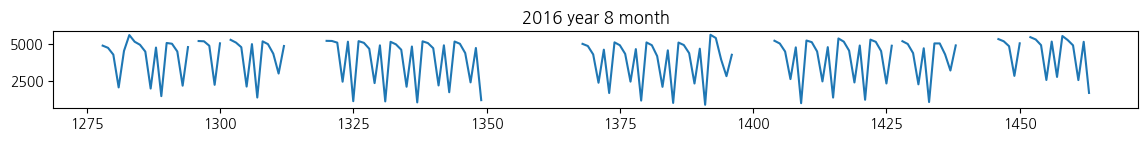

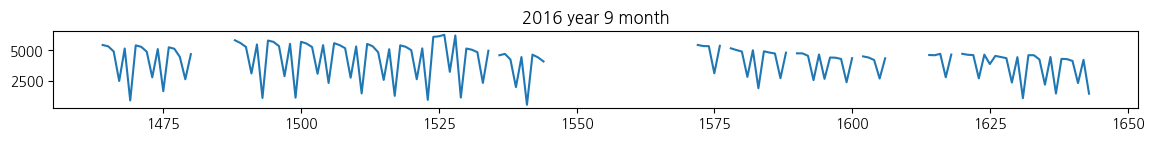

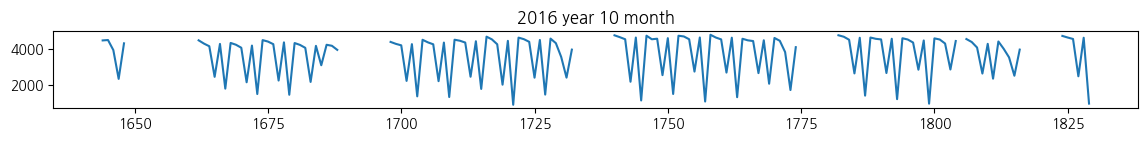

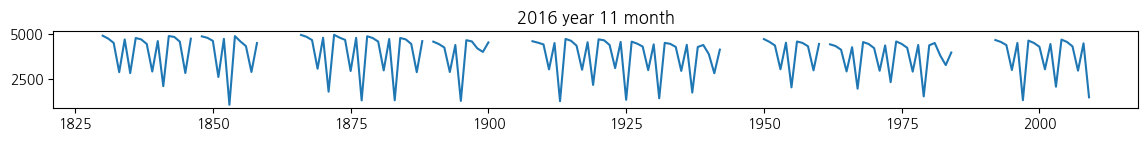

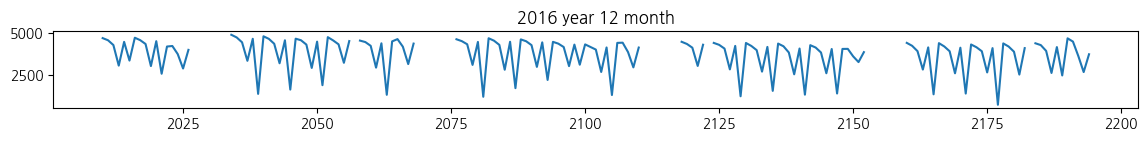

In [104]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month


df['year'] = df['year'].astype('int')
df['month'] = df['month'].astype('int')

for year in df['year'].unique()[:1]:
    for month in df['month'].unique():        
        plt.figure(figsize = (14,1))
        plt.plot(df[(df['year'] == year) & (df['month'] == month)]['가격_전체'])
        plt.title(f'{year} year {month} month')
        plt.show()

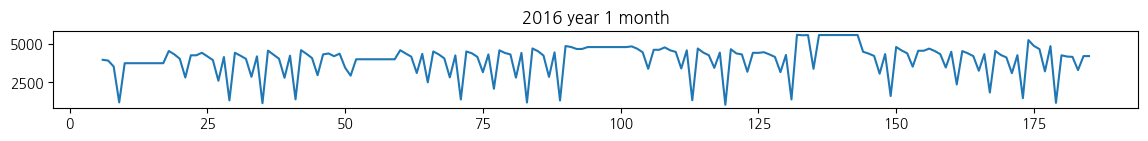

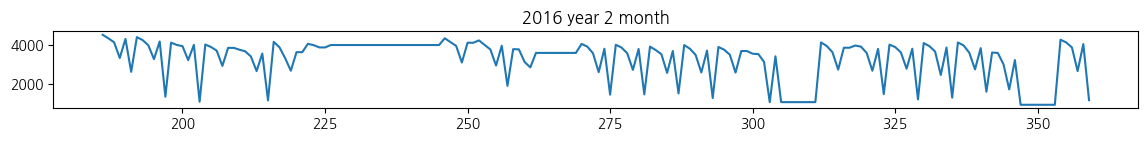

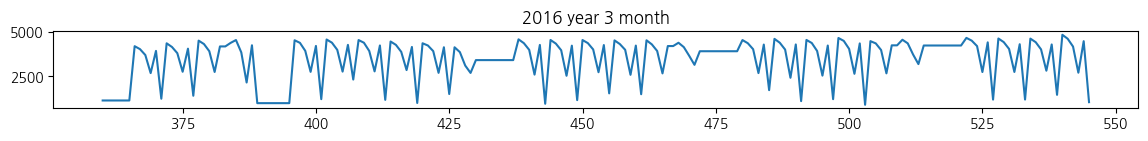

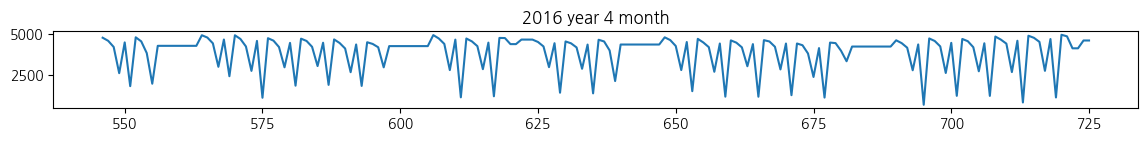

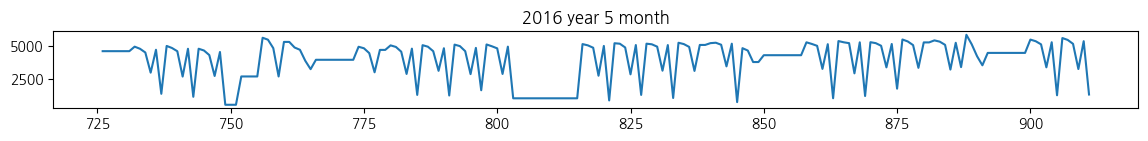

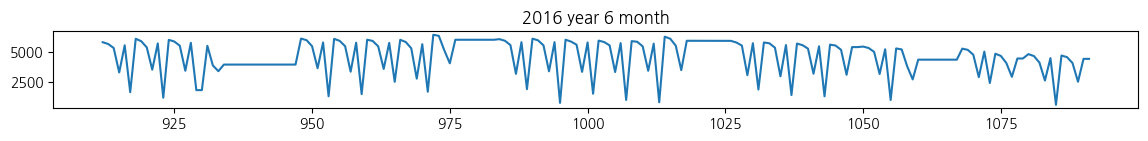

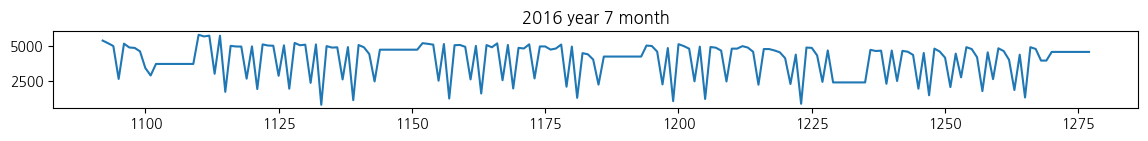

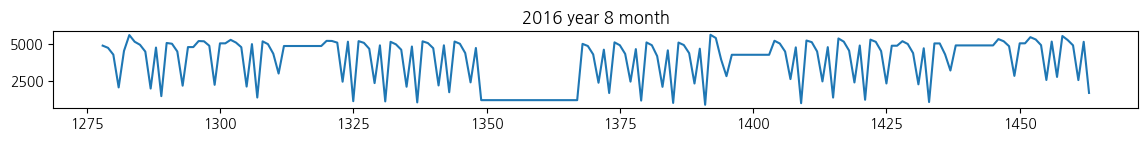

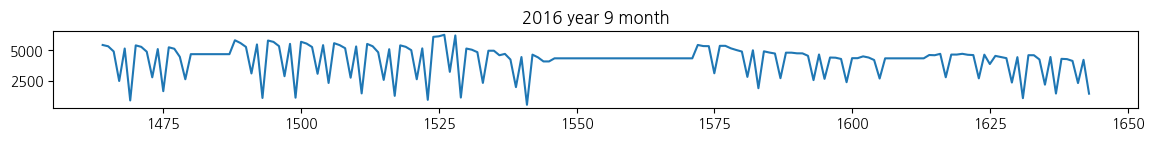

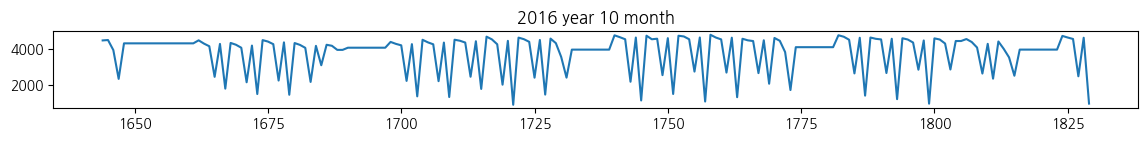

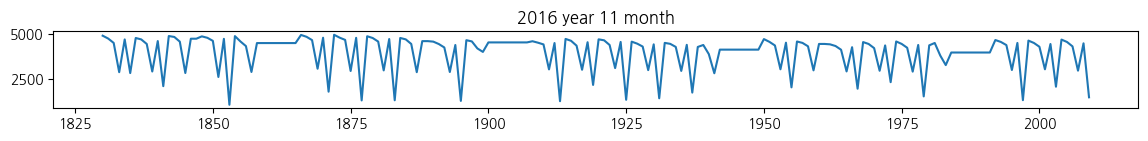

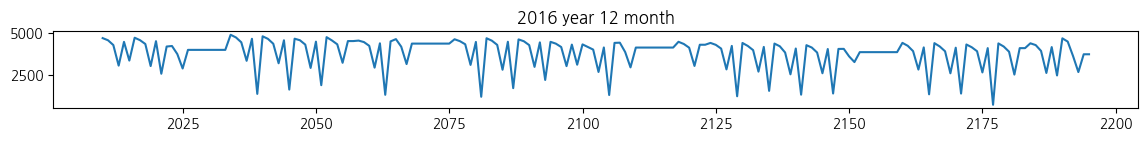

In [108]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month


df['year'] = df['year'].astype('int')
df['month'] = df['month'].astype('int')

for year in df['year'].unique()[:1]:
    for month in df['month'].unique():        
        plt.figure(figsize = (14,1))
        plt.plot(df[(df['year'] == year) & (df['month'] == month)]['가격_전체'])
        plt.title(f'{year} year {month} month')
        plt.show()

In [107]:
df[['가격_전체']] = df[['가격_전체']].fillna(method='ffill')

In [4]:
df['date'] = pd.to_datetime(df['date']) ## Date 형변환
df['weekday'] = df['date'].dt.weekday   ## 요일 데이터 추출

kr_holidays = holidays.KR()             ## 한국 휴일 객체 생성 
df['holiday'] = df.date.apply(lambda x: 'holiday' if x in kr_holidays else 'non-holiday') ## generate holiday table

print(df[df['가격_전체'].isna()]['weekday'].value_counts()) ## 토요일, 일요일에 공백값이 많음 (평일에도 다수 존재)
print(df[df['가격_전체'].isna()]['holiday'].value_counts()) ## 공휴일이 아닐 경우 공백값이 많음

df.fillna(0, inplace = True) ## 공백값 0으로 채우기

6    2118
5    1755
2     184
0     183
4     154
3     150
1     141
Name: weekday, dtype: int64
non-holiday    4128
holiday         557
Name: holiday, dtype: int64


In [5]:
zero_rate = []
for col in list(df)[2:-2]:
    print(f'col {col} Zero num : {df[df[col] == 0].shape}')
    print(f'col {col} Zero rate : {round(df[df[col] == 0].shape[0]/len(df), 2)}')
    zero_rate.append(round(df[df[col] == 0].shape[0]/len(df), 2))
print(f'Zero rate min : {min(zero_rate)}, Zero rate max : {max(zero_rate)}')

col 가격_전체 Zero num : (4685, 40)
col 가격_전체 Zero rate : 0.31
col 두수_전체 Zero num : (4685, 40)
col 두수_전체 Zero rate : 0.31
col 가격_제주제외전체 Zero num : (4850, 40)
col 가격_제주제외전체 Zero rate : 0.32
col 두수_제주제외전체 Zero num : (4850, 40)
col 두수_제주제외전체 Zero rate : 0.32
col 가격_수도권 Zero num : (6502, 40)
col 가격_수도권 Zero rate : 0.43
col 두수_수도권 Zero num : (6502, 40)
col 두수_수도권 Zero rate : 0.43
col 가격_도드람 Zero num : (7366, 40)
col 가격_도드람 Zero rate : 0.48
col 두수_도드람 Zero num : (7366, 40)
col 두수_도드람 Zero rate : 0.48
col 가격_협신식품 Zero num : (7143, 40)
col 가격_협신식품 Zero rate : 0.47
col 두수_협신식품 Zero num : (7143, 40)
col 두수_협신식품 Zero rate : 0.47
col 가격_삼성식품 Zero num : (7738, 40)
col 가격_삼성식품 Zero rate : 0.51
col 두수_삼성식품 Zero num : (7738, 40)
col 두수_삼성식품 Zero rate : 0.51
col 가격_농협부천 Zero num : (11084, 40)
col 가격_농협부천 Zero rate : 0.73
col 두수_농협부천 Zero num : (11084, 40)
col 두수_농협부천 Zero rate : 0.73
col 가격_영남권 Zero num : (5692, 40)
col 가격_영남권 Zero rate : 0.37
col 두수_영남권 Zero num : (5692, 40)
col 두수_영남권 Zero rate : 0.37
co

In [6]:
## 데이터 분류
sudo = ['date','가격_도드람','두수_도드람','가격_협신식품','두수_협신식품','가격_삼성식품','두수_삼성식품','가격_농협부천','두수_농협부천']
young_nam = ['date','가격_김해축공','두수_김해축공','가격_부경축공','두수_부경축공','가격_신흥산업','두수_신흥산업','가격_농협고령','두수_농협고령']
ho_nam = ['date','가격_익산','두수_익산','가격_농협나주','두수_농협나주','가격_삼호축산','두수_삼호축산']

sudo_df = df[sudo].copy()
young_nam_df = df[young_nam].copy()
ho_nam_df = df[ho_nam].copy()

In [7]:
target = 'young_nam'

globals()[f'{target}_df']['total_pig'] = globals()[f'{target}_df'][[col for col in globals()[target] if '두수' in col]].sum(axis = 1)
globals()[f'{target}_df']['total_price'] = globals()[f'{target}_df'][[col for col in globals()[target] if '가격' in col]].sum(axis = 1)
globals()[f'{target}_df']['average_pig'] = globals()[f'{target}_df'][[col for col in globals()[target] if '두수' in col]].mean(axis = 1)
globals()[f'{target}_df']['average_price'] = globals()[f'{target}_df'][[col for col in globals()[target] if '가격' in col]].mean(axis = 1)

for col in list(df):
    if target == 'sudo':
        df_target = '수도권'
    elif target == 'young_nam':
        df_target = '영남권'
    elif target == 'ho_nam':
        df_target = '호남권'
        
temp_df = pd.merge(globals()[f'{target}_df'], df[[f'가격_{df_target}',f'두수_{df_target}']], left_index = True, right_index = True)
temp_df[temp_df[f'가격_{df_target}'] != temp_df['average_price']][['total_pig','total_price','average_pig','average_price',f'가격_{df_target}',f'두수_{df_target}']]

,total_pig,total_price,average_pig,average_price,가격_영남권,두수_영남권
18,388.0,15566.0,97.00,3891.50,3886.0,388.0
19,654.0,15206.0,163.50,3801.50,3792.0,654.0
20,778.0,13885.0,194.50,3471.25,3475.0,778.0
21,179.0,10710.0,44.75,2677.50,2537.0,179.0
22,1820.0,14729.0,455.00,3682.25,3677.0,1820.0
...,...,...,...,...,...,...
15217,265.0,13847.0,66.25,3461.75,4929.0,265.0
15218,493.0,12360.0,123.25,3090.00,4203.0,493.0
15219,520.0,9448.0,130.00,2362.00,3090.0,520.0
15220,953.0,12973.0,238.25,3243.25,4607.0,953.0


In [9]:
print(globals()[f'{target}_df'].shape)
for col in list(globals()[f'{target}_df']):        
    print(f"col {col} 0 num : {globals()[f'{target}_df'][globals()[f'{target}_df'][col] == 0].shape}")

(15228, 13)
col date 0 num : (0, 13)
col 가격_김해축공 0 num : (7921, 13)
col 두수_김해축공 0 num : (7921, 13)
col 가격_부경축공 0 num : (6281, 13)
col 두수_부경축공 0 num : (6281, 13)
col 가격_신흥산업 0 num : (6312, 13)
col 두수_신흥산업 0 num : (6312, 13)
col 가격_농협고령 0 num : (6715, 13)
col 두수_농협고령 0 num : (6715, 13)
col total_pig 0 num : (5692, 13)
col total_price 0 num : (5692, 13)
col average_pig 0 num : (5692, 13)
col average_price 0 num : (5692, 13)


In [61]:
df['등급'].unique()

array(['1+', '1', '2', '등외', '등외제외', '모돈'], dtype=object)

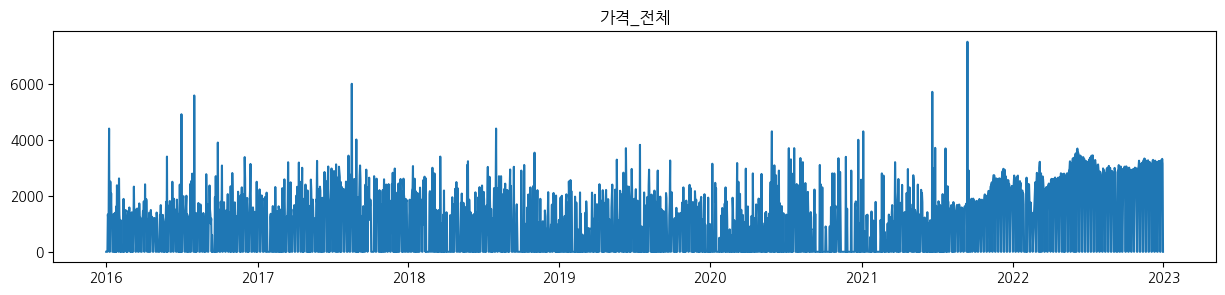

In [63]:
plt.figure(figsize = (15,3))
plt.plot(df[df['등급'] == '모돈']['date'], df[df['등급'] == '모돈']['가격_전체'])
plt.title('가격_전체')
plt.show()    

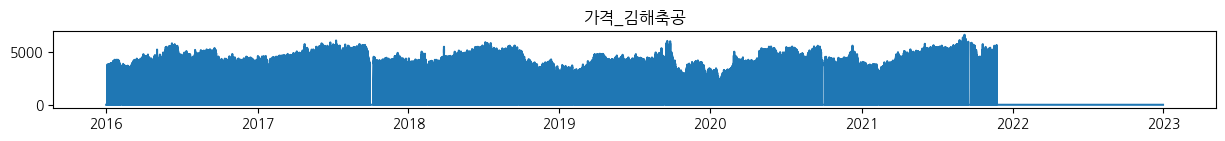

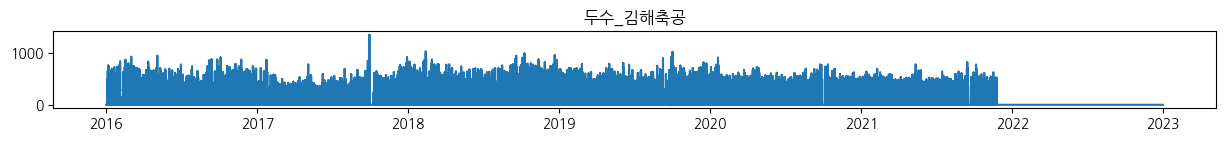

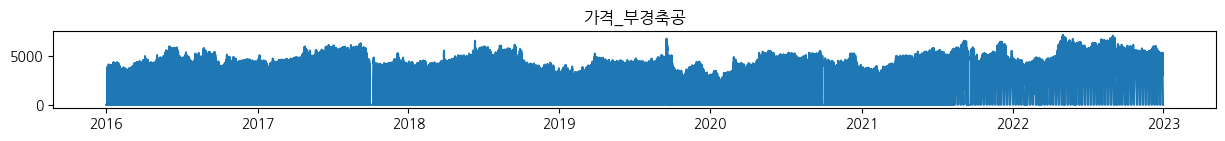

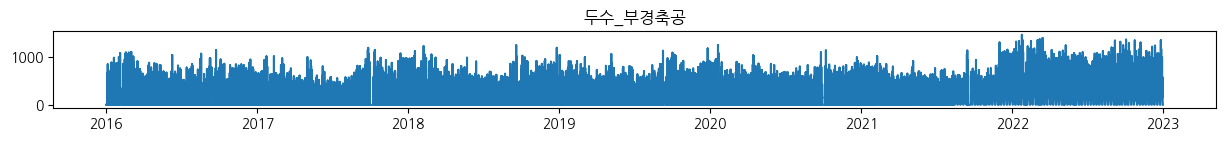

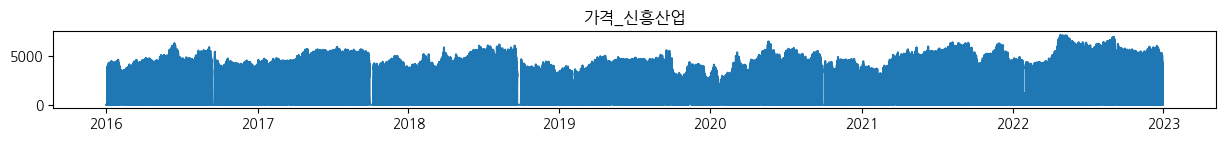

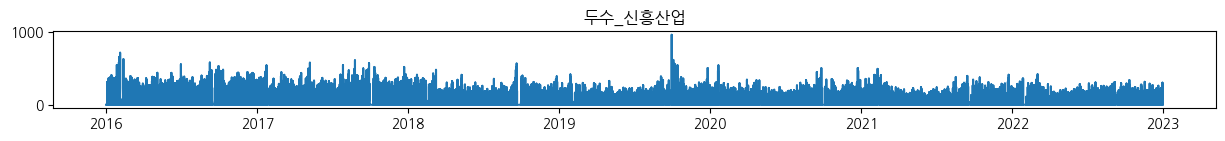

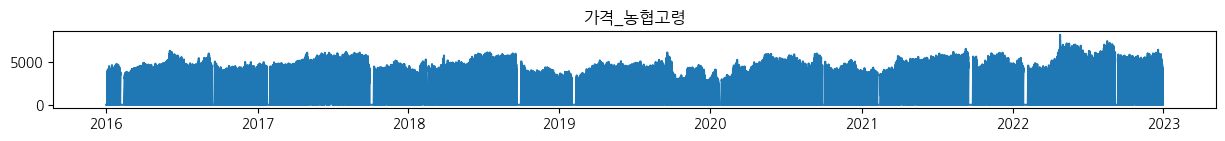

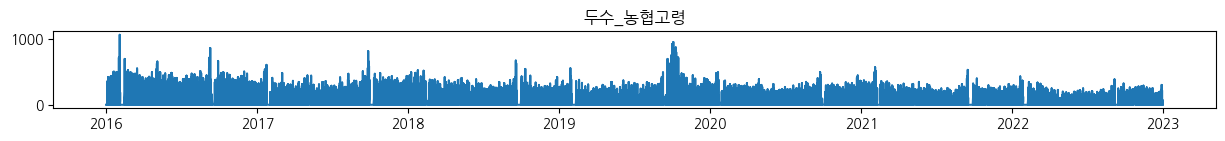

In [15]:
import matplotlib.pyplot as plt

for col in list(young_nam_df)[1:-4]:
    plt.figure(figsize = (15,1))
    plt.plot(young_nam_df['date'], young_nam_df[col])
    plt.title(col)
    plt.show()    

In [20]:
young_nam_df

,date,가격_김해축공,두수_김해축공,가격_부경축공,두수_부경축공,가격_신흥산업,두수_신흥산업,가격_농협고령,두수_농협고령,total_pig,total_price,average_pig,average_price
0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15223,2022-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15224,2022-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15225,2022-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15226,2022-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
forecast_df = pd.DataFrame()
forecast_df[['timestamp','item_id','demand']] = young_nam_df[young_nam].melt(id_vars = 'date')
forecast_df = forecast_df[['item_id','timestamp','demand']]
forecast_df.to_csv('s3://poc-2208-8meals/data/train_data/young_nam_all.csv', index = False)

## Forecast Test

In [59]:
import boto3

session = boto3.Session() 
region = session.region_name
forecast = session.client(service_name="forecast") 
forecast_query = session.client(service_name="forecastquery")
s3 = session.client(service_name="s3")

In [60]:
datagroup_arn = forecast.list_dataset_groups()['DatasetGroups'][0]['DatasetGroupArn']
print(datagroup_arn)

forecast.create_predictor(
    PredictorName='poc_8meals_yong_nam_df_daily_CNNQR_horizon_30',
    AlgorithmArn='arn:aws:forecast:::algorithm/CNN-QR',
    ForecastHorizon=30, ## 몇일 치의 데이터를 볼 것인가
    InputDataConfig={
        'DatasetGroupArn': datagroup_arn,
        'SupplementaryFeatures': [{'Name': 'holiday', 'Value': 'KR'}],
    },
    FeaturizationConfig={
        'ForecastFrequency': 'D',
        'Featurizations': [
            {'AttributeName': 'demand'}
        ]
    }
)

arn:aws:forecast:ap-northeast-2:257832939543:dataset-group/poc_8meals


{'PredictorArn': 'arn:aws:forecast:ap-northeast-2:257832939543:predictor/poc_8meals_yong_nam_df_daily_CNNQR_horizon_30',
 'ResponseMetadata': {'RequestId': '19f17523-7326-4882-b083-ba5b8a122c6b',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'date': 'Mon, 06 Feb 2023 05:30:04 GMT',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '119',
   'connection': 'keep-alive',
   'x-amzn-requestid': '19f17523-7326-4882-b083-ba5b8a122c6b'},
  'RetryAttempts': 0}}

## Results Check

In [110]:
import numpy as np
from datetime import datetime

results = pd.DataFrame()
for i in range(4): 
    results = pd.concat([results, wr.s3.read_csv(f's3://ygone-test/import_domestic_daily_2021_result_2022-11-29T08-12-22Z_part{i}.csv')])    
    
results['item_id'] = results['item_id'].str.upper()
results['date'] = pd.to_datetime(results['date'])
results['p10'] = np.where(results['p10'] <= 0, 0, results['p10'])
results['p50'] = np.where(results['p50'] <= 0, 0, results['p50'])
results['p90'] = np.where(results['p90'] <= 0, 0, results['p90'])
results['month'] = results['date'].dt.month
temp_results = pd.DataFrame(results.groupby(['item_id', 'month'])['p90'].sum()).reset_index()
temp_results[temp_results['item_id'] == 'E5D70060']

,item_id,month,p90
10,E5D70060,1,135.227802
11,E5D70060,12,158.528137


In [109]:
daily_df = daily_df[daily_df['timestamp'] >= '2022-01-01']
daily_df['month'] = daily_df['timestamp'].dt.month
temp = pd.DataFrame(daily_df.groupby(['item_id', 'month'])['demand'].sum()).reset_index()
temp[temp['item_id'] == 'E5D70060']

,item_id,month,demand
32,E5D70060,1,924
33,E5D70060,2,1133
34,E5D70060,3,1421
35,E5D70060,4,1991
36,E5D70060,5,9983
37,E5D70060,6,211
38,E5D70060,7,371
39,E5D70060,8,718
40,E5D70060,9,16527
41,E5D70060,10,4356


In [106]:
results = pd.DataFrame()
for i in range(4): 
    results = pd.concat([results, wr.s3.read_csv(f's3://ygone-test/import_domestic_monthly_2021_result_2022-11-29T08-11-56Z_part{i}.csv')])   

results['item_id'] = results['item_id'].str.upper()
results[results['item_id'] == 'T2829523']

,item_id,date,p10,p50,p90
0,T2829523,2022-01-01T00:00:00Z,0.431112,0.431112,15.944139
1,T2829523,2022-02-01T00:00:00Z,9.856445,38.369549,65.879303
2,T2829523,2022-03-01T00:00:00Z,-22.313131,-22.313131,0.050644
3,T2829523,2022-04-01T00:00:00Z,-7.287752,-7.287752,58.949287
4,T2829523,2022-05-01T00:00:00Z,-20.307013,5.314623,94.159431
5,T2829523,2022-06-01T00:00:00Z,-0.325861,-0.182426,55.342373
6,T2829523,2022-07-01T00:00:00Z,51.406536,51.406536,217.507156
7,T2829523,2022-08-01T00:00:00Z,-19.857927,-19.857927,76.669701
8,T2829523,2022-09-01T00:00:00Z,-9.590769,86.052040,205.939728
9,T2829523,2022-10-01T00:00:00Z,-22.055132,62.792709,181.801727
